---
title: 'Building an LLM agent from scratch'
description: <i>Developing an understanding for how LLM-based agents work.</i>
image: ""
sidebar: false
categories:
  - machine-learning
  - llm
date: "5/2/2024"
format:
  html:
    code-tools: true
---


In [12]:
import litellm
from litellm import completion
from litellm.caching import Cache
import re
from rdkit import Chem
litellm.cache = Cache()
from dotenv import load_dotenv
load_dotenv()

True

LLM-powered agents have caught a lot of an attention. 
They are interesting, because they allow us to couple the flexibility of LLMs with the power of robust tools or knowledge bases.

In the chemical sciences, this approach has been popularized by [ChemCrow](https://arxiv.org/abs/2304.05376) and [Coscientist](https://www.nature.com/articles/s41586-023-06792-0).
In those systems, the LLMs had access to tools such as reaction planner and a cloud laboratory and, in this way, could plan and perform experiments autonomously.

While it might seem that these systems are very complex, they are are surprisingly simple.
Unfortunately, this simplicity is sometimes hidden below layers of abstractions in libraries and frameworks.

In this post, we will implement a simple agent from scratch.

Our goal is to answer simple questions about molecules (such as the number of hydrogen bond donors) reliably.

If we simply prompt an LLM to answer the question about hydrogen bond donors, it might give us something like the completion shown below. 

In [9]:
molecule  = "[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)[C@H]C(=O)"

In [11]:
completion(
    model='gpt-4-turbo', 
    messages = [
        {
            'role': 'user',
            'message': f"What is the number of hydrogen bond donors in the molecule {molecule}?"
        }
    ]
)


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm.set_verbose=True'.



AuthenticationError: OpenAIException - Traceback (most recent call last):
  File "/Users/kevinmaikjablonka/miniconda3/envs/gpttutorial/lib/python3.11/site-packages/litellm/llms/openai.py", line 414, in completion
    raise e
  File "/Users/kevinmaikjablonka/miniconda3/envs/gpttutorial/lib/python3.11/site-packages/litellm/llms/openai.py", line 350, in completion
    openai_client = openai(
                    ^^^^^^^
  File "/Users/kevinmaikjablonka/miniconda3/envs/gpttutorial/lib/python3.11/site-packages/openai/_client.py", line 104, in __init__
    raise openaiError(
openai.openaiError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable


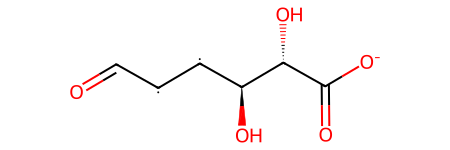

In [10]:
Chem.MolFromSmiles(molecule)

## MRKL and ReAct

One of the most common ways of building LLM powered agents is using the [MRKL](https://arxiv.org/pdf/2205.00445) architecture implemented using the [ReAct](https://arxiv.org/pdf/2210.03629) framework.

MRKL describes in a very general way systems that augment LLMs with external knowledge sources and symbolic reasoning. 
ReAct is a specific prompt that implements MRKL by: 

- Prompting the model to think 
- Prompting the model to act 
- Prompting the model to observe

This is inspired by chain-of-thought prompting, which has been shown to be effective in improving the performance of LLMs on a variety of tasks.

## Using the ReAct prompt

By reading the ReAct paper (or digging [very deep into Langchain's codebase](https://smith.langchain.com/hub/hwchase17/react)), we find that the following text is at the heart of the ReAct framework.

In [ ]:
REACT_PROMPT="""Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer

Thought: you should always think about what to do

Action: the action to take, should be one of [{tool_names}]

Action Input: the input to the action

Observation: the result of the action

... (this Thought/Action/Action Input/Observation can repeat N times)

Thought: I now know the final answer

Final Answer: the final answer to the original input question

Begin!

Question: {input}

Thought:{agent_scratchpad}"""

What we might now be tempted to do is to just send this prompt with a question to OpenAI...

- > stop token
- > actually calling tool 
- > abstracting stuff away

## Creating state

## Beyond hard-coding prompts

## References

- As always, there is an [awesome blogpost by Lilian Weng](https://lilianweng.github.io/posts/2023-06-23-agent/). 
- This blog post was heavily inspired by [Colin Eberhardt's post on implementing LangChain in 100 lines of code](https://blog.scottlogic.com/2023/05/04/langchain-mini.html)